In [0]:
!pip install tf-nightly-2.0-preview


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [0]:
print("You have version", tf.__version__)
assert tf.__version__ >= "2.0" # TensorFlow ≥ 2.0 required


You have version 2.0.0-dev20190214


In [0]:
import numpy as np

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist


In [0]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255


32768/29515=================================] - 0s 0us/step
26427392/26421880==============================] - 0s 0us/step
8192/5148===============================================] - 0s 0us/step
4423680/4422102==============================] - 0s 0us/step


In [0]:
BATCH_SIZE = 128
BUFFER_SIZE = len(x_train)

mnist_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)
  
model = MyModel()

In [0]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)

In [0]:
def test_step(images, labels):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)


In [0]:
EPOCHS = 8
arr = []
test_arr =[]
for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  arr.append(train_accuracy_metric.result()*100)
  test_arr.append(test_accuracy_metric.result() * 100)
    
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))


Epoch 1, Loss: 0.7487, Accuracy: 75.15, Test loss: 0.5712, Test accuracy: 80.90
Epoch 2, Loss: 0.6338, Accuracy: 78.98, Test loss: 0.5419, Test accuracy: 81.72
Epoch 3, Loss: 0.5812, Accuracy: 80.69, Test loss: 0.5239, Test accuracy: 82.24
Epoch 4, Loss: 0.5493, Accuracy: 81.70, Test loss: 0.5114, Test accuracy: 82.61
Epoch 5, Loss: 0.5273, Accuracy: 82.39, Test loss: 0.5021, Test accuracy: 82.88
Epoch 6, Loss: 0.5110, Accuracy: 82.90, Test loss: 0.4948, Test accuracy: 83.08
Epoch 7, Loss: 0.4982, Accuracy: 83.30, Test loss: 0.4890, Test accuracy: 83.24
Epoch 8, Loss: 0.4878, Accuracy: 83.61, Test loss: 0.4842, Test accuracy: 83.37


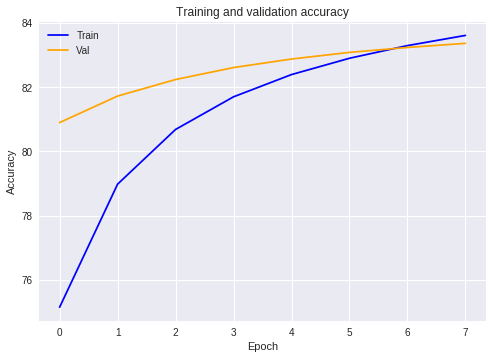

In [0]:



# Get the number of epochs
epochs = range(len(arr))

plt.title('Training and validation accuracy')
plt.plot(epochs, arr, color='blue', label='Train')
plt.plot(epochs, test_arr, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

In [0]:
BATCH_SIZE = 128
BUFFER_SIZE = len(x_train)

mnist_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)
  
model = MyModel()

In [0]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)

In [0]:
def test_step(images, labels):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)

In [0]:
EPOCHS = 8
arr = []
test_arr =[]
for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  arr.append(train_accuracy_metric.result()*100)
  test_arr.append(test_accuracy_metric.result() * 100)
    
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))



Epoch 1, Loss: 0.5544, Accuracy: 81.04, Test loss: 0.4566, Test accuracy: 83.86
Epoch 2, Loss: 0.4783, Accuracy: 83.47, Test loss: 0.4333, Test accuracy: 84.66
Epoch 3, Loss: 0.4399, Accuracy: 84.71, Test loss: 0.4194, Test accuracy: 84.99
Epoch 4, Loss: 0.4143, Accuracy: 85.54, Test loss: 0.4086, Test accuracy: 85.32
Epoch 5, Loss: 0.3950, Accuracy: 86.16, Test loss: 0.3999, Test accuracy: 85.62
Epoch 6, Loss: 0.3793, Accuracy: 86.67, Test loss: 0.3922, Test accuracy: 85.89
Epoch 7, Loss: 0.3663, Accuracy: 87.10, Test loss: 0.3864, Test accuracy: 86.09
Epoch 8, Loss: 0.3551, Accuracy: 87.47, Test loss: 0.3816, Test accuracy: 86.26


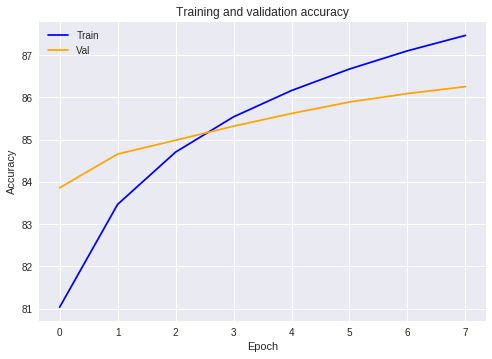

In [53]:
# Get the number of epochs
epochs = range(len(arr))

plt.title('Training and validation accuracy')
plt.plot(epochs, arr, color='blue', label='Train')
plt.plot(epochs, test_arr, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()